In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('data_4.csv')

data = data.drop(['REF_DATE'], axis=1)
data = pd.get_dummies(data, columns=['GEO', 'Category', 'Farm products', 'CattleType'], drop_first=False)

y = data.YoY_change_1
X = data.drop(columns=['YoY_change_1'])

print(X.shape, y.shape)

n_test = 12765
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size = n_test, shuffle=False)

print(Xtrain.shape,Xtest.shape)

(65298, 83) (65298,)
(52533, 83) (12765, 83)


(array([1.2000e+01, 3.9000e+01, 9.6000e+01, 4.6200e+02, 8.1040e+03,
        3.5781e+04, 7.5700e+03, 4.4400e+02, 2.2000e+01, 3.0000e+00]),
 array([-9.20028122, -7.52315704, -5.84603287, -4.16890869, -2.49178452,
        -0.81466034,  0.86246383,  2.53958801,  4.21671218,  5.89383636,
         7.57096053]),
 <BarContainer object of 10 artists>)

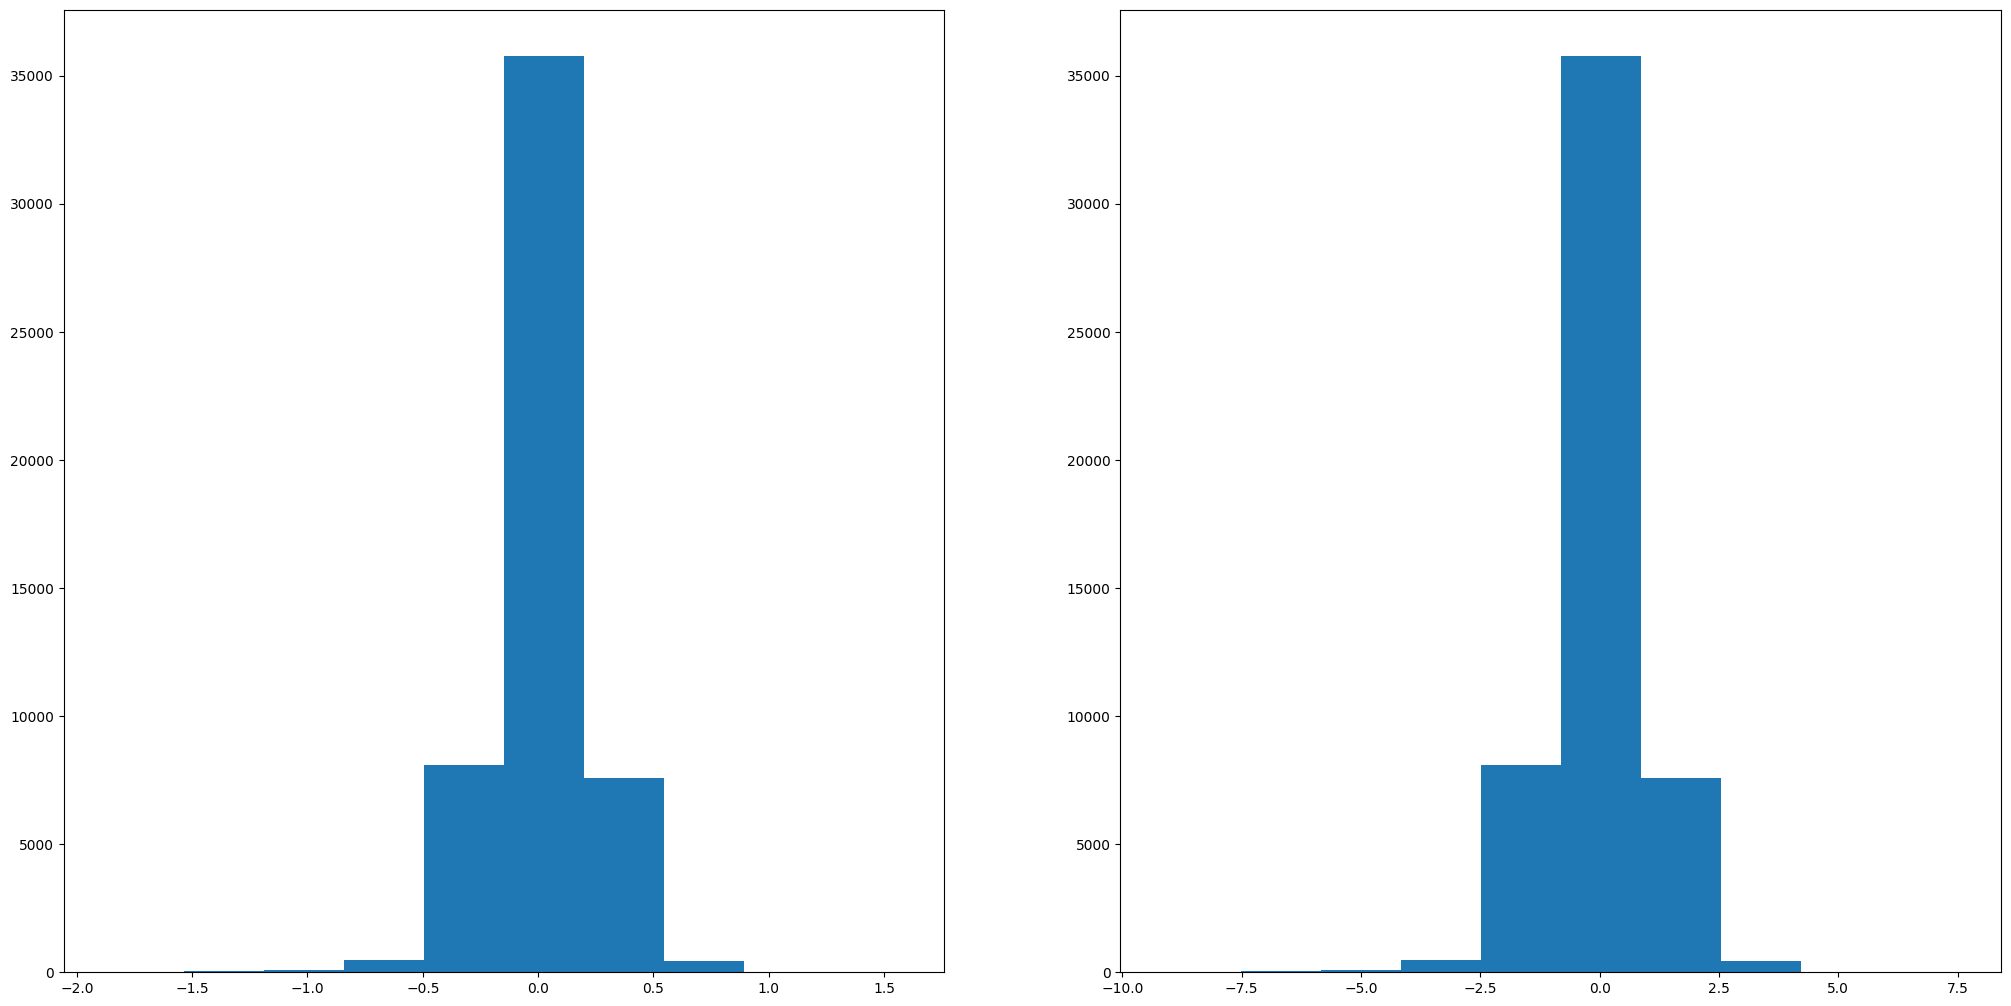

In [4]:
alphas = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 100]
Standardize = Pipeline([
    ('scaling', StandardScaler()),
    ('linear_regression', LinearRegression())])
stamina_index = Xtrain.columns.get_loc('YoY_change_0')

fig, axs = plt.subplots(1,2, figsize = (25,12.5))
axs[0].hist(Xtrain.YoY_change_0)


Standardize = Standardize.fit(Xtrain, ytrain)
Xtrain_standard = Standardize[:-1].transform(Xtrain)
axs[1].hist(Xtrain_standard[:,stamina_index])

In [ ]:
all_quad_interact = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False))
])

all_quad_interact = all_quad_interact.fit(Xtrain, ytrain)
all_data = all_quad_interact.transform(Xtrain)

In [6]:
all_data.shape

(52533, 3569)

In [ ]:
all_Standard = Standardize.fit(all_data, ytrain)
all_scores = cross_val_score(all_Standard, all_data, ytrain, cv=10, scoring='neg_mean_squared_error')

print(all_Standard.score(all_data, ytrain))

In [ ]:
StandardizeRidge = Pipeline([
    ('scaling', StandardScaler()),
    ('ridge', Lasso(alpha=.5))])

lasso = StandardizeRidge.fit(all_data, ytrain)
all_scores = cross_val_score(lasso, all_data, ytrain, cv=10, scoring='neg_mean_squared_error')

print(-np.mean(all_scores))

0.04342055900223086


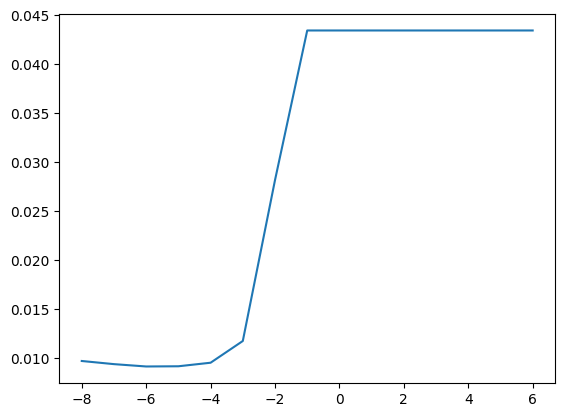

In [12]:
alphas = [np.exp(i) for i in range(-8,6+1)]

scores = []

for alpha in alphas:
    RidgeModel = Pipeline([('scaling', StandardScaler()),
                            ('ridge_reg', Lasso(alpha = alpha))])
    RidgeModel = RidgeModel.fit(all_data, ytrain)
    scores.append(-np.mean(cross_val_score(RidgeModel, all_data, ytrain, cv=10, scoring='neg_mean_squared_error')))

plt.plot(np.log(alphas), scores)

In [27]:
StandardizeRidge = Pipeline([
    ('scaling', StandardScaler()),
    ('ridge', Lasso(alpha=np.exp(-6)))])

lasso = StandardizeRidge.fit(all_data, ytrain)
all_scores = cross_val_score(lasso, all_data, ytrain, cv=3, scoring='neg_mean_squared_error')

print(-np.mean(all_scores))

0.009122577644776794


In [ ]:
lasso.score(all_data, ytrain)

0.7983365298423646

In [ ]:
test_quad = all_quad_interact.transform(Xtest)
lasso.score(test_quad, ytest)

0.69098860081288

In [ ]:
beta_indexes = [i for i, x in enumerate(lasso[1].coef_) if x != 0.0]
p = PolynomialFeatures(degree=2, include_bias=False)
all_quad_interact[0].get_feature_names_out()[beta_indexes]

array(['YoY_change_0', 'GDP_-3 Gas_Regular_0', 'GDP_-3 Category_plant',
       'Diesel_-3 Min Temperature_-3', 'Diesel_-3 YoY_change_0',
       'Gas_Regular_-3^2', 'Gas_Regular_-3 Min Temperature_-3',
       'Gas_Regular_-3 Category_cattle',
       'Gas_Regular_-3 CattleType_for_slaughter',
       'Max Temperature_-3 GDP_-2', 'Max Temperature_-3 GDP_-1',
       'Min Temperature_-3 Gas_Regular_-1',
       'Min Temperature_-3 YoY_change_0',
       'Snow on ground at EOM_-3 Diesel_0',
       'Snow on ground at EOM_-3 Gas_Regular_0',
       '# precipitation days_-3 YoY_change_0',
       '# warm days (18C+)_-3 YoY_change_-1',
       'YoY_change_-3 Min Temperature_-2',
       'YoY_change_-3 Category_cattle',
       'YoY_change_-3 CattleType_for_feeding',
       'Gas_Regular_-2 Category_otheranimal',
       'Gas_Regular_-2 Farm products_Hogs [111121]',
       'Min Temperature_-2 YoY_change_0',
       'YoY_change_-2 Farm products_Calves', 'Diesel_-1 Category_cattle',
       'Diesel_-1 Farm pro